In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import sys, os

root = os.path.dirname(os.getcwd())
sys.path.insert(0, root)

In [2]:
def get(hist):

    evals = []
    F = []
    G1 = []
    G2 = []

    for algorithm in history:

        F.append(algorithm.pop.get("F").min())
        G1.append(algorithm.pop.get("G")[:, 0].min())
        G2.append(algorithm.pop.get("G")[:, 1].min())
        evals.append(algorithm.evaluator.n_eval)


    F = np.array(F)
    G1 = np.array(G1)
    G2 = np.array(G2)
    
    return F, G1, G2, evals

    

In [16]:
data = {}

for k in range(110):
    folder = os.path.join(root, "results", "ga")
    fname = "ga_%s" % k
    
    print(fname, end=" ")

    try:
        
        history = np.load(os.path.join(folder, fname + ".npy"), allow_pickle=True)
        F, G1, G2, evals = get(history)
        
        feasible = None
        for h in history:
            if np.any(h.pop.get("feasible")):
                feasible = h
                break
        
        
        data[fname] = {
            "algorithm" : history[-1],
            "feasible" : feasible,
            "F" : F,
            "G1" : G1,
            "G2" : G2,
            "evals" : evals, 
        }
        
    except Exception as e:
        print(e)
        continue
    

    

ga_0 ga_1 ga_2 ga_3 ga_4 ga_5 ga_6 ga_7 ga_8 ga_9 ga_10 ga_11 ga_12 ga_13 ga_14 ga_15 ga_16 ga_17 ga_18 ga_19 ga_20 ga_21 ga_22 ga_23 ga_24 ga_25 ga_26 ga_27 ga_28 ga_29 ga_30 ga_31 ga_32 ga_33 ga_34 ga_35 ga_36 ga_37 ga_38 ga_39 ga_40 ga_41 ga_42 ga_43 ga_44 ga_45 ga_46 ga_47 ga_48 ga_49 ga_50 ga_51 ga_52 ga_53 ga_54 ga_55 ga_56 ga_57 ga_58 ga_59 ga_60 ga_61 ga_62 ga_63 ga_64 ga_65 ga_66 ga_67 ga_68 ga_69 ga_70 ga_71 ga_72 ga_73 ga_74 ga_75 ga_76 ga_77 ga_78 ga_79 ga_80 ga_81 ga_82 ga_83 ga_84 ga_85 ga_86 ga_87 ga_88 ga_89 ga_90 ga_91 ga_92 ga_93 ga_94 ga_95 ga_96 ga_97 ga_98 ga_99 ga_100 ga_101 ga_102 ga_103 ga_104 ga_105 ga_106 ga_107 ga_108 ga_109 

In [17]:
keys = list(data.keys())
res = np.array([data[k]["F"].min() for k in keys])
top = [keys[i] for i in res.argsort()[:5]]

ga_68
n_gen 10000
G1 (max) 2681.56339237072
G2 (max) 224.85824992465444
Feasible since n_eval 6600
F (feasible) 54162.80929906769
F (best) 24413.953903156846
X (best) [-9773 -7049 -4480 -3672 -3504 -2031 -1226 -1091  -691  -339]
[31 19 12  9 20 22 27 27 30 30 20 27 33 17 14 19 20 17 17  5 27 27 27 23
 26 37 29 35 34 31 27 22 21 31 29 21 13 20 14 19 12 19 12 19 17 17  9 14
 11 13 19 12 14  8 13  8 27 13 10 14 18 14 18 20 16 18 14 23 14 19 19 14
 22 27 22 18 27 27 24 24 26 14 18 24 27 29 27 20 22 27 27 30 10 29 25 19
 33 32 31 17 29 31 34 30 24 33 27 25 24 21 15  6 19 13 19 16 19 20 19 18
 14 14 14 20 13 20 16 17  7 13 13 10 14 18 14 11 14 12 14 14 19 11 19 22
 13 22  1 13 11 14 14 14 12 11  5  8  6  8  5  7  3  7  3  7  1  6  1  7
  1  7  1 11  1 10  6 16  1 12  2 12  1 17  1  7 17 13  1  5  1  1  1  5
  7  7  8  8 11 11 12 11 20 10 22 11  7  1 27 16 19  1  5 12 13  6  7  1
 13  1  5  2  4  1  8  1  6 10  8  5 15  3  4  4 14  4  1  5 24  8 16 22
  6  7 18 16  7  8  8 10  7  8 12  6 18  

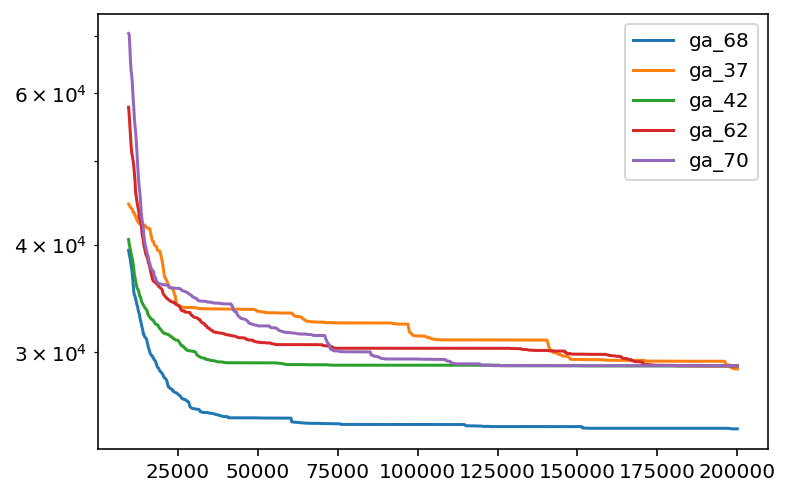

In [18]:

for fname in top:
    
    val = data[fname]
    
    F, G1, G2, evals, algorithm, feasible = val["F"], val["G1"], val["G2"], val["evals"], val["algorithm"], val["feasible"]
    
    f = algorithm.pop.get("F")
    best = f.argmin()
    x = algorithm.pop.get("X")[best]
    
    
    print(fname)
    
    
    print("n_gen", algorithm.n_gen)
    print("G1 (max)", G1.max())
    print("G2 (max)", G2.max())
    print("Feasible since n_eval", feasible.evaluator.n_eval)
    print("F (feasible)", feasible.pop.get("F").min())
    
    print("F (best)", algorithm.pop.get("F").min())
    
    print("X (best)", x[-10:])
    print(x[:-10])
    print("=" * 30)
    
    
#     plt.plot(evals[feas:feas+100], F[feas:feas+100], label=str(k))
    
    plt.plot(evals[feas:], F[feas:], label=fname)
    
plt.yscale("log")
plt.legend()
plt.show()

    

In [131]:
data = {}

for k in range(100):
    folder = os.path.join(root, "results", "cmaes")
    
    fname = "cmaes_%s" % k
    
    try:
        
        print(fname, end=" ")
        
        F = np.loadtxt(os.path.join(folder, "cmaes_%s.%s" % (k, "f")))
        G = np.loadtxt(os.path.join(folder, "cmaes_%s.%s" % (k, "g")))
        X = np.loadtxt(os.path.join(folder, "cmaes_%s.%s" % (k, "x")))
        
        data[fname] = {
            "F" : np.atleast_2d(F),
            "G" : G,
            "X" : X
            
        }
        
    except Exception as e:
        print(e)
        continue
    



cmaes_0 cmaes_1 cmaes_2 cmaes_3 cmaes_4 cmaes_5 cmaes_6 cmaes_7 cmaes_8 cmaes_9 cmaes_10 cmaes_11 cmaes_12 cmaes_13 cmaes_14 cmaes_15 cmaes_16 cmaes_17 cmaes_18 cmaes_19 cmaes_20 cmaes_21 cmaes_22 cmaes_23 cmaes_24 cmaes_25 cmaes_26 cmaes_27 cmaes_28 cmaes_29 cmaes_30 cmaes_31 cmaes_32 cmaes_33 cmaes_34 cmaes_35 cmaes_36 cmaes_37 cmaes_38 cmaes_39 cmaes_40 cmaes_41 cmaes_42 cmaes_43 cmaes_44 cmaes_45 cmaes_46 cmaes_47 cmaes_48 cmaes_49 cmaes_50 cmaes_51 cmaes_52 cmaes_53 cmaes_54 cmaes_55 cmaes_56 cmaes_57 cmaes_58 cmaes_59 cmaes_60 cmaes_61 cmaes_62 cmaes_63 cmaes_64 cmaes_65 cmaes_66 cmaes_67 cmaes_68 cmaes_69 cmaes_70 cmaes_71 cmaes_72 cmaes_73 cmaes_74 cmaes_75 cmaes_76 cmaes_77 cmaes_78 cmaes_79 cmaes_80 cmaes_81 cmaes_82 cmaes_83 cmaes_84 cmaes_85 cmaes_86 cmaes_87 cmaes_88 cmaes_89 cmaes_90 cmaes_91 cmaes_92 cmaes_93 cmaes_94 cmaes_95 cmaes_96 cmaes_97 cmaes_98 cmaes_99 

In [138]:
keys = list(data.keys())
res = np.array([data[k]["F"].min() for k in keys])
top = [keys[i] for i in res.argsort()]

In [139]:
for fname in top:
    val = data[fname]
    
    F, G, X = val["F"][0], val["G"][0], val["X"][0]
    
    feas = np.where(G1+G2 == 0)[0].min()
    f = algorithm.pop.get("F")
    best = f.argmin()
    x = algorithm.pop.get("X")[best]
    
    
    print(fname)
    
    print("F", F)
    print("G", G)
    print("=" * 30)
    


    

cmaes_8
F [18860.54671612 18860.49220515 18860.75367989 18860.59632765
 18860.75367989 18860.59632765 18860.75367989 18860.59632765
 18860.75367989 18860.59632765 18860.59632765 18860.75367989
 18860.67702309 18860.59632765 18860.59632765 18860.59632765
 18860.75367989 18860.75367989 18860.54671612 18860.75367989]
G [1043.25095528  348.30288678]
cmaes_22
F [19481.59481757]
G 942.6956738276133
cmaes_82
F [19739.94444689]
G 729.9301813029889
cmaes_59
F [19800.63313598]
G 788.0056142722906
cmaes_94
F [20227.08343955]
G 829.1433124725428
cmaes_6
F [20991.66540002]
G 862.4670018967038
cmaes_1
F [21365.88035877]
G 561.8949110571252
cmaes_85
F [21722.29412833]
G 711.7646892591554
cmaes_42
F [22820.77861413]
G 745.0619096195081
cmaes_25
F [23583.26660329 23587.43322843 23583.07018559 23583.41577865
 23582.92263188 23582.95090838 23582.83966595 23588.7748809
 23583.35914286 23588.255882   23583.78052213 23588.69567898
 23582.92263188 23583.07018559 23582.91274077 23589.38537503
 23582.92263188 

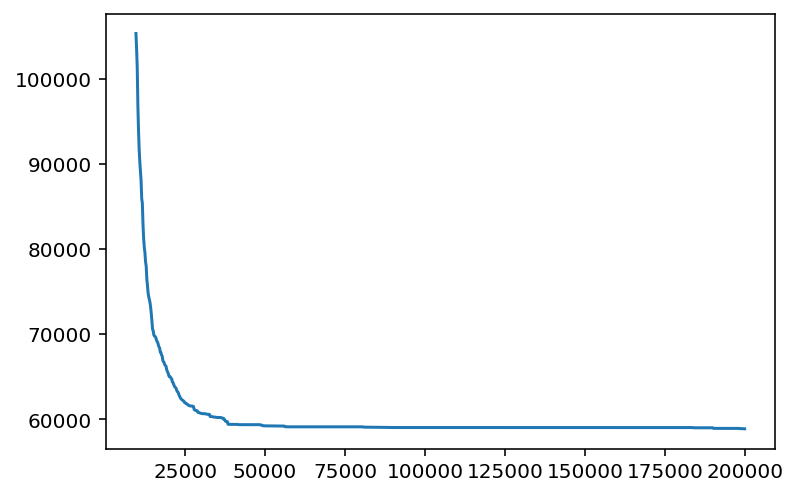

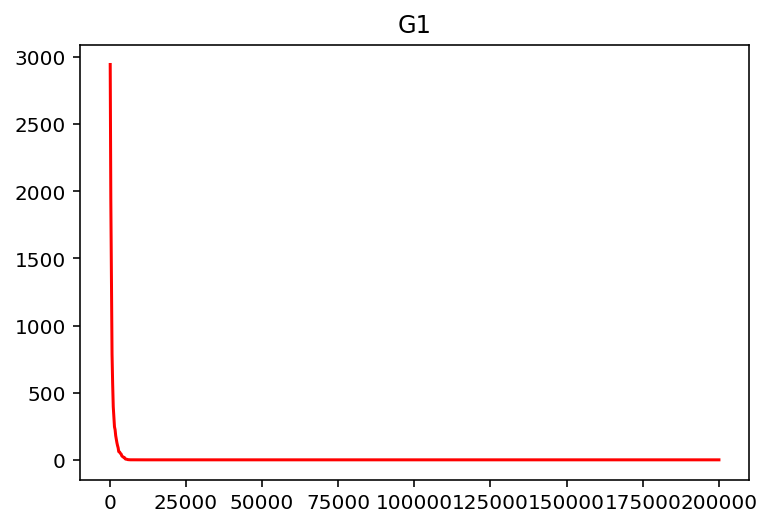

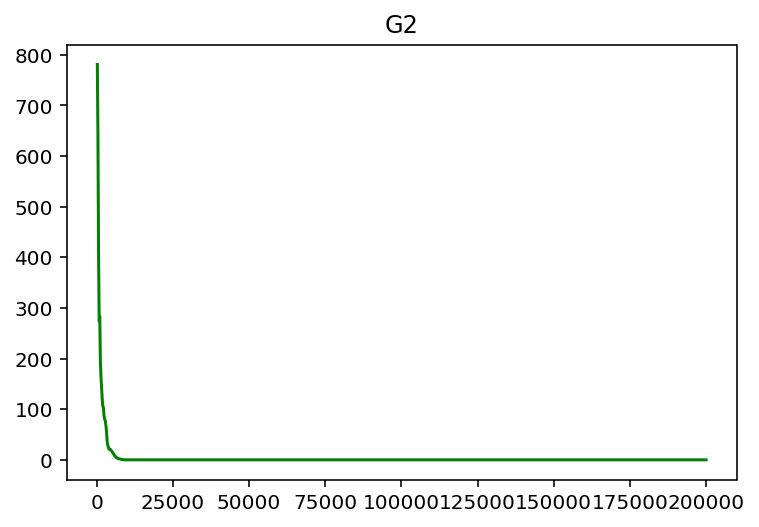

In [19]:
plt.plot(evals[feas:], F[feas:], label="F")
#plt.yscale("log")
plt.show()

plt.title("G1")
plt.plot(evals, G1, color="red")
plt.show()

plt.title("G2")
plt.plot(evals, G2, color="green")
plt.show()


